In [1]:
import fancyimpute as fi
import numpy as np
import matplotlib.pyplot as plt

/Users/boris/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
true_iris = np.loadtxt('./testing/iris.trunc')
dropped_iris = np.loadtxt('./testing/iris.drop')
nan_iris = dropped_iris.copy()
nan_iris[nan_iris == 0] = np.nan

forest_prediction = np.loadtxt('./iris_test/run.prediction')

In [4]:
forest_prediction.shape

(150, 4)

In [5]:
soft_iris = fi.SoftImpute().complete(nan_iris)

knn_iris = fi.KNN(k=15).complete(nan_iris)

factorized_iris = fi.MatrixFactorization().complete(nan_iris)

# iterative_iris = fi.IterativeSVD(rank=5).complete(nan_iris)

[SoftImpute] Max Singular Value of X_init = 57.851354
[SoftImpute] Iter 1: observed MAE=0.112952 rank=4
[SoftImpute] Iter 2: observed MAE=0.113033 rank=4
[SoftImpute] Iter 3: observed MAE=0.113110 rank=4
[SoftImpute] Iter 4: observed MAE=0.113167 rank=4
[SoftImpute] Iter 5: observed MAE=0.113203 rank=4
[SoftImpute] Iter 6: observed MAE=0.113219 rank=4
[SoftImpute] Iter 7: observed MAE=0.113216 rank=4
[SoftImpute] Iter 8: observed MAE=0.113205 rank=4
[SoftImpute] Iter 9: observed MAE=0.113176 rank=4
[SoftImpute] Iter 10: observed MAE=0.113147 rank=4
[SoftImpute] Iter 11: observed MAE=0.113149 rank=4
[SoftImpute] Iter 12: observed MAE=0.113149 rank=4
[SoftImpute] Iter 13: observed MAE=0.113148 rank=4
[SoftImpute] Iter 14: observed MAE=0.113162 rank=4
[SoftImpute] Iter 15: observed MAE=0.113187 rank=4
[SoftImpute] Iter 16: observed MAE=0.113225 rank=4
[SoftImpute] Iter 17: observed MAE=0.113301 rank=4
[SoftImpute] Iter 18: observed MAE=0.113375 rank=4
[SoftImpute] Iter 19: observed MAE=0.

/Users/boris/anaconda2/lib/python2.7/site-packages/fancyimpute/soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold


Train on 272 samples, validate on 31 samples
Epoch 1/10000
 - 0s - loss: 1.1569 - val_loss: 0.9808
Epoch 2/10000
 - 0s - loss: 1.1505 - val_loss: 0.9808
Epoch 3/10000
 - 0s - loss: 1.1459 - val_loss: 0.9807
Epoch 4/10000
 - 0s - loss: 1.1416 - val_loss: 0.9807
Epoch 5/10000
 - 0s - loss: 1.1373 - val_loss: 0.9806
Epoch 6/10000
 - 0s - loss: 1.1329 - val_loss: 0.9806


In [6]:
from scipy.stats import pearsonr

guess_mask = dropped_iris.flatten() == 0

truth = true_iris.flatten()[guess_mask] 

print "Pearson correlations of Soft, KNN, Factorized, and Forest"
print pearsonr(soft_iris.flatten()[guess_mask],truth)
print pearsonr(knn_iris.flatten()[guess_mask],truth)
print pearsonr(factorized_iris.flatten()[guess_mask],truth)
print pearsonr(forest_prediction.flatten()[guess_mask],truth)

print "MSE of Soft, KNN, Factorized, and Forest"
print np.mean(((soft_iris.flatten()[guess_mask] - truth) ** 2))
print np.mean(((knn_iris.flatten()[guess_mask] - truth) ** 2))
print np.mean(((factorized_iris.flatten()[guess_mask] - truth) ** 2))
print np.mean(((forest_prediction.flatten()[guess_mask] - truth) ** 2))


Pearson correlations of Soft, KNN, Factorized, and Forest
(0.48377715988504383, 7.90176513435414e-19)
(0.6837735434729524, 2.8620467372970634e-42)
(0.8107852334490395, 1.3907112648797251e-70)
(0.8597820561961369, 4.2750508831899193e-88)
MSE of Soft, KNN, Factorized, and Forest
6.334918032720332
2.8831063180438306
1.304560784041086
0.9945618386632821


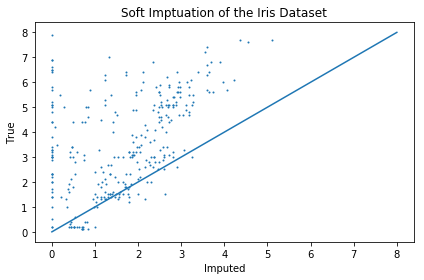

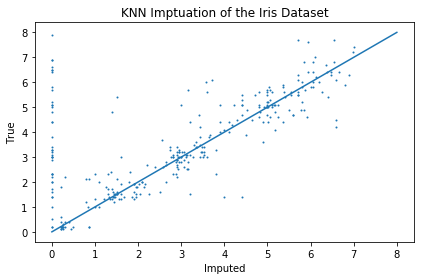

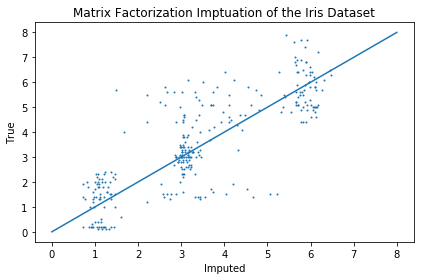

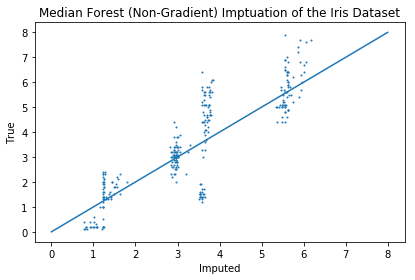

In [7]:
plt.figure("soft_iris")
plt.title("Soft Imptuation of the Iris Dataset")
plt.xlabel("Imputed")
plt.ylabel("True")
plt.scatter(soft_iris.flatten()[guess_mask],true_iris.flatten()[guess_mask],s=1)
plt.plot([0,8],[0,8])
plt.tight_layout()
plt.savefig("figures/soft_iris_scatter.png")

plt.figure("knn_iris")
plt.title("KNN Imptuation of the Iris Dataset")
plt.xlabel("Imputed")
plt.ylabel("True")
plt.scatter(knn_iris.flatten()[guess_mask],true_iris.flatten()[guess_mask],s=1)
plt.plot([0,8],[0,8])
plt.tight_layout()
plt.savefig("figures/knn_iris_scatter.png")

plt.figure("factorized_iris")
plt.title("Matrix Factorization Imptuation of the Iris Dataset")
plt.xlabel("Imputed")
plt.ylabel("True")
plt.scatter(factorized_iris.flatten()[guess_mask],true_iris.flatten()[guess_mask],s=1)
plt.plot([0,8],[0,8])
plt.tight_layout()
plt.savefig("figures/factorized_iris_scatter.png")

plt.figure("forest_iris")
plt.title("Median Forest (Non-Gradient) Imptuation of the Iris Dataset")
plt.xlabel("Imputed")
plt.ylabel("True")
plt.scatter(forest_prediction.flatten()[guess_mask],true_iris.flatten()[guess_mask],s=1)
plt.plot([0,8],[0,8])
plt.tight_layout()
plt.savefig("figures/forest_iris_scatter.png")

In [9]:
true_counts = np.loadtxt('../raw_data/counts.txt')
mask = np.loadtxt('./testing/holdout_mask_counts.txt')
held_out_counts = np.loadtxt('./testing/held_out_counts.txt')



Pearson R
(0.6128320281253961, 0.0)
MSE
7.327915327959825
MAE
1.6695743090233197


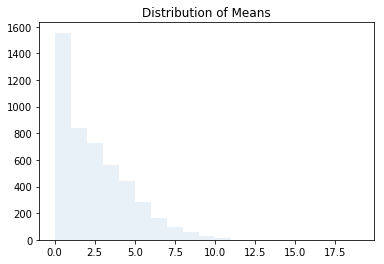

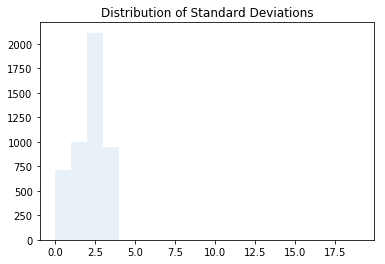

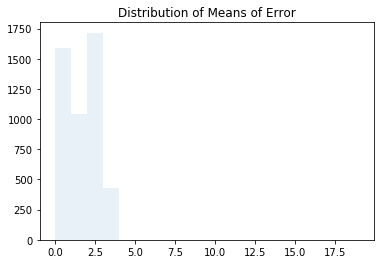

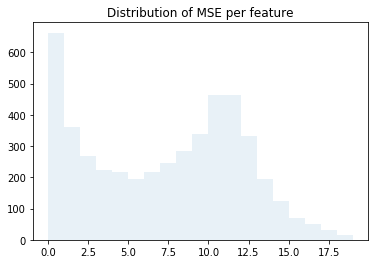

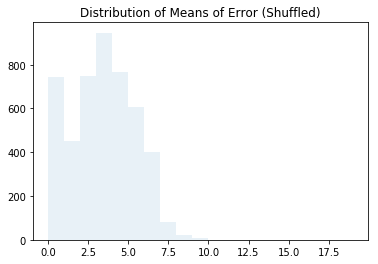

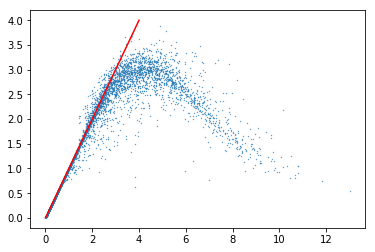

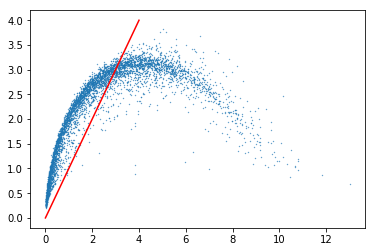

In [29]:
from scipy.stats import pearsonr

# predicted = np.loadtxt('./predictions/combined_prediction')

print "Pearson R"
print pearsonr(predicted.flatten(),true_counts.flatten())

print "MSE"
print np.mean((predicted.flatten() - true_counts.flatten()) ** 2)

print "MAE"
print np.mean(np.abs(predicted.flatten() - true_counts.flatten()))

# print np.var(predicted,axis=0).shape

plt.figure("means")
plt.title("Distribution of Means")
plt.hist(np.mean(true_counts,axis=0),bins=np.arange(20),alpha=.1,label="Data")
plt.show()

plt.figure("stds")
plt.title("Distribution of Standard Deviations")
plt.hist(np.std(true_counts,axis=0), bins=np.arange(20),alpha=.1,label="Data")
plt.show()

plt.figure("naive_mae")
plt.title("Distribution of Means of Error")
plt.hist(np.mean(np.abs(true_counts - predicted), axis=0),bins=np.arange(20),alpha=.1,label="Error")
plt.show()

plt.figure("naive_mse")
plt.title("Distribution of MSE per feature")
plt.hist(np.mean((true_counts - predicted)**2, axis=0),bins=np.arange(20),alpha=.1,label="Error")
plt.show()

np.random.shuffle(predicted)
plt.figure("mae_shuffled")
plt.title("Distribution of Means of Error (Shuffled)")
plt.hist(np.var(np.abs(true_counts - predicted),axis=0),bins=np.arange(20),alpha=.1,label="Shuffled")
# plt.legend()
plt.show()

plt.figure("mae_vs_mean")
plt.scatter(np.mean(true_counts,axis=0),np.mean(np.abs(true_counts - predicted), axis=0),s=.1)
plt.plot([0,4],[0,4],c='r')
plt.show()

plt.figure("var_vs_mean")
plt.scatter(np.mean(true_counts,axis=0),np.std(true_counts,axis=0),s=.1)
plt.plot([0,4],[0,4],c='r')
plt.show()

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

import time

start_time = time.time()

for i in range(10):

    print "Selecting features"
    
    in_features = np.random.rand(true_counts.shape[1]) > .7
    out_features = np.logical_not(in_features)

    training_samples = np.random.rand(true_counts.shape[0]) > .3
    testing_samples = np.logical_not(training_samples)

    training_in = true_counts[training_samples].T[in_features].T
    training_out = true_counts[training_samples].T[out_features].T

    testing_in = true_counts[testing_samples].T[in_features].T
    testing_out = true_counts[testing_samples].T[out_features].T

    print "Initializing feature"
    
    forest = RandomForestRegressor(n_estimators=100,min_samples_split=50,n_jobs=int(10),max_features=400)

    print "Fitting"
    
    forest.fit(training_in,training_out)
    
    print "Predicting"
    
    prediction = forest.predict(testing_in)

    print np.sum(in_features)
    print np.sum(out_features)
    print np.sum(training_samples)
    print np.sum(testing_samples)
    
    print prediction.shape
    print testing_out.shape
    
    print "Pearson R"
    print pearsonr(testing_out.flatten(),prediction.flatten())
    
    print "MSE"
    print np.mean((prediction.flatten() - testing_out.flatten()) ** 2)
    
    print "MAE"
    print np.mean(np.abs(prediction.flatten() - testing_out.flatten()))

    
print "Fitting done"

end_time = time.time()

print start_time - end_time

Selecting features
Initializing feature
Fitting
Predicting
1444
3329
1154
502
(502, 3329)
(502, 3329)
Pearson R
(0.7275842910711691, 0.0)
MSE
4.823108863814566
MAE
1.5584528919489191
Selecting features
Initializing feature
Fitting
Predicting
1434
3339
1166
490
(490, 3339)
(490, 3339)
Pearson R
(0.7342439664334037, 0.0)
MSE
4.76043535408578
MAE
1.5472492657191645
Selecting features
Initializing feature
Fitting
Predicting
1391
3382
1145
511
(511, 3382)
(511, 3382)
Pearson R
(0.733285297582682, 0.0)
MSE
4.7368093831354114
MAE
1.5410275043620185
Selecting features
Initializing feature
Fitting
Predicting
1418
3355
1150
506
(506, 3355)
(506, 3355)
Pearson R
(0.7267174918491696, 0.0)
MSE
4.700305876534168
MAE
1.5294776825711234
Selecting features
Initializing feature
Fitting
Predicting
1416
3357
1141
515
(515, 3357)
(515, 3357)
Pearson R
(0.72768039721213, 0.0)
MSE
4.7952197567567065
MAE
1.5520801137903295
Selecting features
Initializing feature
Fitting


KeyboardInterrupt: 

In [3]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import train_test_split
# from scipy.stats import pearsonr

# import time

# start_time = time.time()

# for i in range(10):

#     print "Selecting features"
    
#     in_features = np.random.rand(true_counts.shape[1]) > .7
#     out_features = np.logical_not(in_features)

#     training_samples = np.random.rand(true_counts.shape[0]) > .3
#     testing_samples = np.logical_not(training_samples)

#     training_in = true_counts[training_samples].T[in_features].T
#     training_out = true_counts[training_samples].T[out_features].T

#     testing_in = true_counts[testing_samples].T[in_features].T
#     testing_out = true_counts[testing_samples].T[out_features].T

#     print "Initializing feature"
    
#     forest = GradientBoostingRegressor()

#     print "Fitting"
    
#     forest.fit(training_in,training_out)
    
#     print "Predicting"
    
#     prediction = forest.predict(testing_in)

#     print np.sum(in_features)
#     print np.sum(out_features)
#     print np.sum(training_samples)
#     print np.sum(testing_samples)
    
#     print prediction.shape
#     print testing_out.shape
    
#     print "Pearson R"
#     print pearsonr(testing_out.flatten(),prediction.flatten())
    
#     print "MSE"
#     print np.mean((prediction.flatten() - testing_out.flatten()) ** 2)
    
#     print "MAE"
#     print np.mean(np.abs(prediction.flatten() - testing_out.flatten()))

    
# print "Fitting done"

# end_time = time.time()

# print start_time - end_time

In [4]:
# np.savetxt("results/sklearn_imputed_builtin",imputed_builtin)

In [11]:
nan_counts = held_out_counts.copy()
nan_counts[nan_counts == 0] = np.nan

soft_blood = fi.SoftImpute().complete(nan_counts)

knn_blood = fi.KNN(k=15).complete(nan_counts)

[SoftImpute] Max Singular Value of X_init = 8854.092393
[SoftImpute] Iter 1: observed MAE=1.765728 rank=465
[SoftImpute] Iter 2: observed MAE=1.796569 rank=248
[SoftImpute] Iter 3: observed MAE=1.818110 rank=194
[SoftImpute] Iter 4: observed MAE=1.830402 rank=178
[SoftImpute] Iter 5: observed MAE=1.837418 rank=171
[SoftImpute] Iter 6: observed MAE=1.841685 rank=169
[SoftImpute] Iter 7: observed MAE=1.844460 rank=168
[SoftImpute] Iter 8: observed MAE=1.846368 rank=167
[SoftImpute] Iter 9: observed MAE=1.847741 rank=167
[SoftImpute] Iter 10: observed MAE=1.848766 rank=167
[SoftImpute] Iter 11: observed MAE=1.849551 rank=167
[SoftImpute] Iter 12: observed MAE=1.850165 rank=167
[SoftImpute] Iter 13: observed MAE=1.850654 rank=167
[SoftImpute] Iter 14: observed MAE=1.851051 rank=166
[SoftImpute] Iter 15: observed MAE=1.851375 rank=165
[SoftImpute] Iter 16: observed MAE=1.851643 rank=165
[SoftImpute] Iter 17: observed MAE=1.851866 rank=165
[SoftImpute] Iter 18: observed MAE=1.852055 rank=165

In [12]:
mask = mask.astype(dtype=bool)
# mask = np.logical_and(true_counts != 0, mask)

truth = true_counts[mask].flatten()
pred_basic_forest = imputed_basic[mask].flatten()
pred_gradient = imputed_gradient[mask].flatten()

pred_builtin = imputed_builtin[mask].flatten()

pred_knn = knn_blood[mask].flatten()
pred_soft = soft_blood[mask].flatten()

print "Pearson of random, gradient, builtin, knn, and soft"

print pearsonr(truth,pred_basic_forest)
print pearsonr(truth,pred_gradient)
print pearsonr(truth,pred_builtin)
print pearsonr(truth,pred_knn)
print pearsonr(truth,pred_soft)

print "MSE of random, gradient, builtin, knn, and soft"

print np.mean((pred_basic_forest - truth) ** 2)
print np.mean((pred_gradient - truth) ** 2)
print np.mean((pred_builtin - truth) ** 2)
print np.mean((pred_knn - truth) ** 2)
print np.mean((pred_soft - truth) ** 2)

print "Mean absolute error"
print np.mean(np.abs(pred_basic_forest - truth))
print np.mean(np.abs(pred_gradient - truth))
print np.mean(np.abs(pred_builtin - truth))
print np.mean(np.abs(pred_knn - truth))
print np.mean(np.abs(pred_soft - truth))


Pearson of random, gradient, builtin, knn, and soft
(0.6848569561310256, 0.0)
(0.7019318277796232, 0.0)
(0.7308469512166057, 0.0)
(0.6920752261742283, 0.0)
(0.7232950822940634, 0.0)
MSE of random, gradient, builtin, knn, and soft
6.56285699371205
6.194642469952815
4.863459958130654
7.01140603345094
5.784440309634853
Mean absolute error
1.978525470444395
1.9500387516736526
1.542929451240752
2.3315705680269323
2.0413681353822093


(4773,)
(1656,)


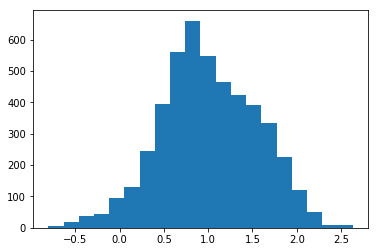

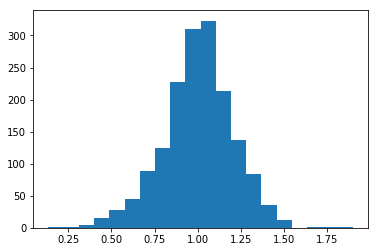

In [13]:
error = imputed_basic - true_counts 

mean_cell_error = np.mean(error,axis=1)
mean_gene_error = np.mean(error,axis=0)

print mean_gene_error.shape
print mean_cell_error.shape

plt.figure()
plt.hist(mean_gene_error,bins=20)
plt.show()

plt.figure()
plt.hist(mean_cell_error,bins=20)
plt.show()


In [14]:
pearsonr(true_counts.flatten(),imputed_gradient.flatten())

(0.7184516010910961, 0.0)

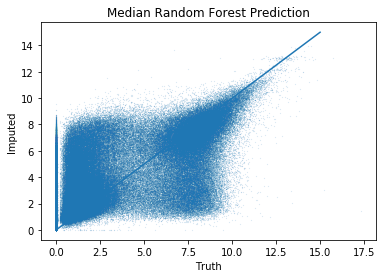

In [15]:
plt.figure()
plt.title("Median Random Forest Prediction")
plt.xlabel("Truth")
plt.ylabel("Imputed")
plt.scatter(truth,pred_basic_forest,s=.003)
plt.plot([0,15],[0,15])
plt.savefig('figures/basic_error_scatter.png')

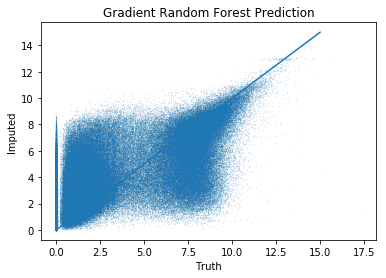

In [16]:
plt.figure()
plt.title("Gradient Random Forest Prediction")
plt.xlabel("Truth")
plt.ylabel("Imputed")
plt.scatter(truth,pred_gradient,s=.003)
plt.plot([0,15],[0,15])
plt.savefig('figures/gradient_error_scatter.png')

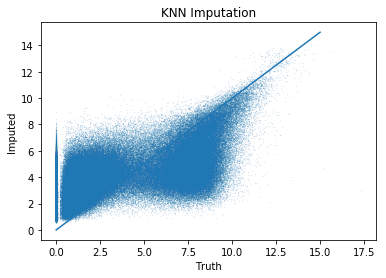

In [17]:
plt.figure()
plt.title("KNN Imputation")
plt.xlabel("Truth")
plt.ylabel("Imputed")
plt.scatter(truth,pred_knn,s=.003)
plt.plot([0,15],[0,15])
plt.savefig('figures/knn_error_scatter.png')

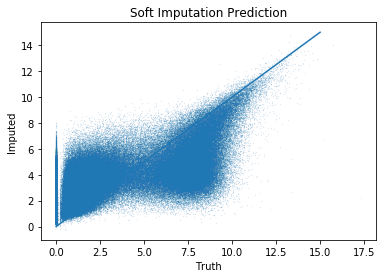

In [18]:
plt.figure()
plt.title("Soft Imputation Prediction")
plt.xlabel("Truth")
plt.ylabel("Imputed")
plt.scatter(truth,pred_soft,s=.003)
plt.plot([0,15],[0,15])
plt.savefig('figures/soft_error_scatter.png')

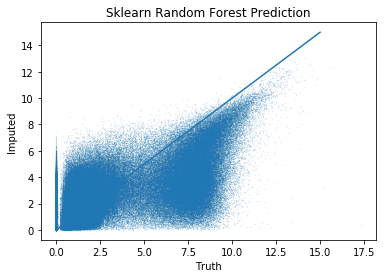

In [19]:
plt.figure()
plt.title("Sklearn Random Forest Prediction")
plt.xlabel("Truth")
plt.ylabel("Imputed")
plt.scatter(truth,pred_builtin,s=.003)
plt.plot([0,15],[0,15])
plt.savefig('figures/sklearn_rf_error_scatter.png')